In [1]:
import numpy as np
import numpy.random as nrand
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
Y_MIN = -0.6931471805599453
Y_MAX = 0.942657031435126
BASES = np.asarray(['A','C','G'])

In [3]:
def load_sequence(sequences):
    shape = sequences.shape
    data = sequences[..., None] == BASES
    return data.reshape(shape[0], shape[1] * BASES.size)

def tolog(y,Y_MIN,Y_MAX):
    y = np.log(y)
    y = y - Y_MIN
    y = y/Y_MAX
    return y

def normalize(array):
    MIN = np.min(array)
    MAX = np.max(array)
    return MAX-MIN, (array-MIN)/(MAX-MIN)

In [4]:
with open("../5_Empirical_Extrapolation/trna_Li/All_data_df.pkl",'rb') as f:
    data = pickle.load(f)

data2 = pd.read_csv("../5_Empirical_Extrapolation/trna_Domingo/trna_Domingo_data.csv")
data3 = pd.read_csv("../5_Empirical_Extrapolation/SD_seq/SD_seq_arti_data.csv")

In [5]:
data_filtered = data[np.sum(data[['FitS1','FitS2','FitS3','FitS4','FitS5','FitS6']] == 0.5,axis=1) == 0]
data_tolog = tolog(data_filtered[['FitS1','FitS2','FitS3','FitS4','FitS5','FitS6']],Y_MIN,Y_MAX)
data_tolog['FitMean'] = data_tolog.mean(axis=1)
data_tolog['std'] = data_tolog.std(axis=1)

In [6]:
data_plot = pd.DataFrame()
scale, FitMean = normalize(data2.fitness)
data_plot['FitMean'] = FitMean
data_plot['std'] = data2.SE*np.sqrt(6)/scale

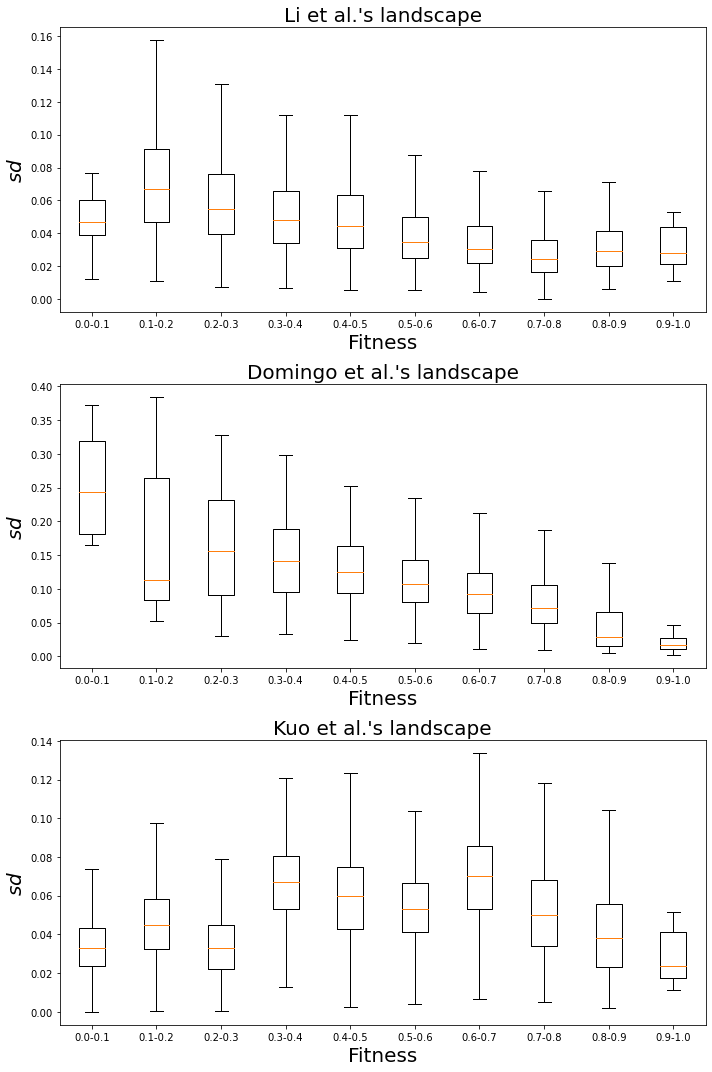

In [8]:
FL_list = ["Li et al.'s landscape",
           "Domingo et al.'s landscape",
           "Kuo et al.'s landscape"]
fig,axes = plt.subplots(3,1,figsize=[10,15])
for j in range(3):
    data_plot = pd.DataFrame()
    if j == 0:
        data_plot['FitMean'] = data_tolog['FitMean']
        data_plot['std'] = data_tolog['std']
    elif j== 1:
        scale, FitMean = normalize(data2.fitness)
        data_plot['FitMean'] = FitMean
        data_plot['std'] = data2.SE*np.sqrt(6)/scale
    elif j == 2:
        scale, FitMean = normalize(data3['mean'])
        data_plot['FitMean'] = FitMean
        data_plot['std'] = data3[['P1','P2','P3']].std(axis=1)/scale
    ax = axes[j]
    ax.set_title(FL_list[j],fontsize=20)
    ax.set_xlabel('Fitness',fontsize=20)
    ax.set_ylabel('$sd$',fontsize=20)
    y_list = []
    x_list = []
    for i in range(10):
        std_list = data_plot[(data_plot['FitMean']<(i+1)*0.1) & (data_plot['FitMean']>=i*0.1)]['std']
        y_list.append(list(std_list))
        #_list += [f'{i*0.1:.3}-{i*0.1+0.1:.3}']*len(std_list)
        x_list = [i]*len(std_list)
    ax.boxplot(y_list,showfliers=False,widths=0.4,labels=[f'{i*0.1:.3}-{i*0.1+0.1:.3}' for i in range(10)])
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=20)
plt.tight_layout()
#plt.show()
plt.savefig('FigS13.pdf')